# Tarea PCA
### Laboratorio de Aprendizaje Estadístico

José Armando Melchor Soto  | 745697

--- 




### Librerías: 

In [1018]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as smf
import warnings
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
import xgboost as xgb 
from xgboost import  XGBRegressor, XGBClassifier, plot_importance as xgb_plot_importance, callback as xgb_callback
from catboost import CatBoostRegressor, CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMRegressor,LGBMClassifier, plot_importance,early_stopping, log_evaluation
import shap 
import shap.plots
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from IPython.display import display




warnings.simplefilter(action='ignore', category=FutureWarning)

colors = ["cornflowerblue", "indianred", "darkseagreen", "plum", "dimgray"]

---

### Dataset : 
Titanic

In [1019]:
df = pd.read_csv('Hitters.csv')

In [1020]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


#### Dummies

In [1021]:
df = pd.get_dummies(df, drop_first=True)
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN,False,False,False
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,True,True,True
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,False,True,False
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,True,False,True
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,700.0,True,False,True
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,875.0,False,False,False
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,385.0,False,True,False
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,960.0,False,False,False


### Visualización del Dataset

In [1022]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN,False,False,False
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,True,True,True
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,False,True,False
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,True,False,True
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,True,False,True


In [1023]:
print(df.columns)


Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'Salary', 'League_N', 'Division_W', 'NewLeague_N'],
      dtype='object')


---

### NaN's

In [1024]:
pd.DataFrame(df.isnull().sum()).T

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,0,0,0


In [1025]:
df['Salary'] = df['Salary'].fillna(df['Salary'].median())

Age es la que más NaN's tiene así que tratamos de eliminar eso, sacando la mediana.

In [1026]:
pd.DataFrame(df.isnull().sum()).T

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


---

### **Modelo**

##### La variable a predecir: Survived

Se pide que el modelo tenga: 

test set: 20%
random_state: 42

In [1027]:
target= 'Salary'
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

---

### Funciones 

##### Función Calibración


In [1028]:
def calibracion(predicciones, y, bins):
    df_calibracion = pd.DataFrame({
        'predicciones': predicciones,
        'y': y
    })
    
    df_calibracion['bins'] = pd.qcut(df_calibracion['predicciones'], q=bins, labels=False) + 1
    gropuped = df_calibracion.groupby('bins').mean()
    
    plt.plot(gropuped.predicciones, gropuped.y, label="Modelo", marker="o")
    plt.plot(gropuped.predicciones, gropuped.predicciones, label="Real", marker="o")
    plt.grid()
    plt.legend()
    plt.xlabel("Prediccion")
    plt.ylabel("Real")

##### Función KMeans

In [1029]:
def kmeans(df, columnas, max_clusters=11):
    X = df[columnas].values

    inertias = []
    
    for k in range(1, max_clusters + 1):
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('kmeans', KMeans(n_clusters=k, random_state=42))
        ])
        pipeline.fit(X)
        inertia = pipeline.named_steps['kmeans'].inertia_
        inertias.append(inertia)

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), inertias, marker='o')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Inercia')
    plt.title('Método del Codo')
    plt.grid(True)
    plt.show()


##### Función Clusters

In [1030]:
def clusters(df, clusters, comp_x='PC1', comp_y='PC2'):
    df = df.copy().dropna()

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('kmeans', KMeans(n_clusters=clusters, random_state=42))
    ])

    pipeline.fit(df)
    df['cluster'] = pipeline.predict(df)

    pca = PCA(n_components=max(6, clusters))
    X_pca = pca.fit_transform(df)

    x_components = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
    x_components['Cluster'] = df['cluster'] + 1

    plt.figure(figsize=(8, 6))
    plt.scatter(x_components[comp_x], x_components[comp_y], c=x_components['Cluster'])
    plt.xlabel(comp_x)
    plt.ylabel(comp_y)
    plt.title(f'Con {clusters} Clusters visualizados en {comp_x} y {comp_y}')
    plt.show()



##### Función PCA

In [1031]:
def pca(X, n_var):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA())
    ])

    pipeline.fit(X)
    objeto_pca = pipeline.named_steps['pca']

    X_pca = pipeline.transform(X)
    x_components = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

    plt.plot(objeto_pca.explained_variance_ratio_, marker='o')
    plt.grid(True)
    plt.show()

    return x_components.head()

##### Función PCA Varianza

In [1032]:
def var_pca(X, n_var):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n_var)) 
    ])

    pipeline.fit(X)
    objeto_pca = pipeline.named_steps['pca']

    X_pca = pipeline.transform(X)
    x_components = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

    plt.plot(objeto_pca.explained_variance_ratio_, marker='o')
    plt.xlabel('Componente Principal')
    plt.ylabel('Varianza Explicada')
    plt.title('Varianza Explicada por Componente')
    plt.grid(True)
    plt.show()

    varianza = pd.DataFrame({
        f'PC{i+1}': objeto_pca.explained_variance_ratio_[i] for i in range(n_var)
    }, index=['Varianza']).T

    display(varianza)

    return x_components.head()




##### Función Gráfica n PCA

In [1033]:
def plot_pca(X, comp_x='PC1', comp_y='PC2'):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA())
    ])

    pipeline.fit(X)
    objeto_pca = pipeline.named_steps['pca']

    X_pca = pipeline.transform(X)
    x_components = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
    
    if comp_x not in x_components.columns or comp_y not in x_components.columns:
        raise ValueError(f"Componentes inválidas: {comp_x}, {comp_y}. Usa nombres como 'PC1', 'PC2', etc.")

    plt.figure(figsize=(8, 6))
    plt.scatter(x_components[comp_x], x_components[comp_y], alpha=1)
    plt.xlabel(comp_x)
    plt.ylabel(comp_y)
    plt.title(f'PCA - Proyección en {comp_x} y {comp_y}')
    plt.grid(True)
    plt.show()


### Correlación

In [1034]:
df.corr()['Salary'].sort_values(ascending=False).head()

Salary    1.000000
CRuns     0.502752
CRBI      0.494533
CHits     0.490008
CAtBat    0.465903
Name: Salary, dtype: float64

---

### *Modelos*

#### PCA

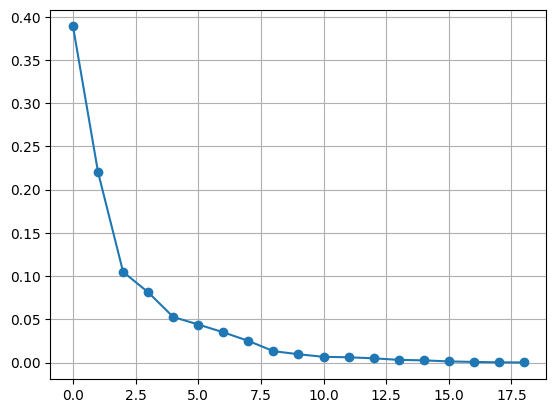

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,-3.148574,0.397351,-0.742261,1.245588,-0.810391,1.614381,0.612399,0.038086,-1.471513,0.596323,-0.047288,0.123212,-0.306135,0.229513,-0.048924,-0.176358,-0.041789,0.019460,-0.003996
1,0.135285,-1.448727,1.479314,-0.755414,1.167223,1.187283,-0.120551,0.074044,-0.304588,-0.587528,-0.738533,-0.242448,0.451020,0.415653,0.104455,0.146255,-0.088777,0.038851,-0.023783
2,0.680705,2.644298,-1.054130,-0.240709,1.332703,1.631734,-0.486483,1.121797,-0.470945,-0.001062,-0.187406,0.036160,-0.390836,-0.021356,0.096158,0.142120,-0.040317,0.014489,-0.007015
3,3.500055,-0.622816,0.860148,-1.667498,-1.032131,-0.797360,1.031120,-0.829870,0.186594,0.654312,-0.031407,-0.053846,-0.147804,-0.375193,0.119140,0.010434,0.207760,0.046482,-0.057232
4,-2.343490,0.658322,0.794039,-2.020713,-0.681705,1.598507,-0.034022,-0.220414,0.443612,0.110105,0.204629,0.054436,-0.129684,0.052821,0.048642,0.028665,0.038485,0.013067,-0.015288


In [1035]:
pca(X, n_var=3)

#### Varianza PCA

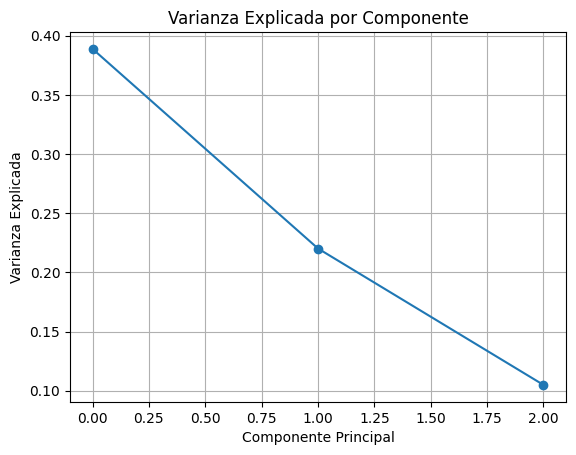

,Varianza
PC1,0.388809
PC2,0.220123
PC3,0.104860


,PC1,PC2,PC3
0,-3.148574,0.397351,-0.742261
1,0.135285,-1.448727,1.479314
2,0.680705,2.644298,-1.054130
3,3.500055,-0.622816,0.860148
4,-2.343490,0.658322,0.794039


In [1036]:
var_pca(X, n_var=3)

In [1049]:
0.38+0.22+0.1

0.7

Los primeros componentes suman 0.7 , lo que significa que esto explica el 70% de la varianza de los componentes, lo cual pudiera ser importante para los 19 componentes que tiene este dataset. Se pudiera buscar una componente mejor, pero no significa que sea muy necesario tener otra. Por lo que el 70% ya es muy bueno.

##### Con los principales componentes

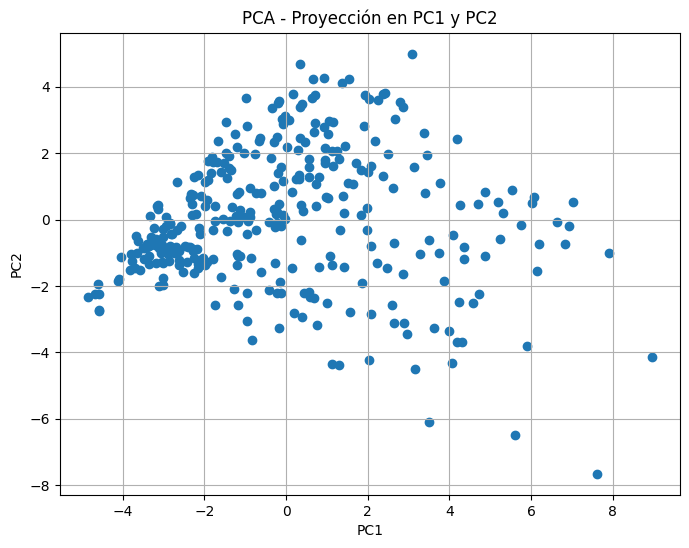

In [1037]:
plot_pca(X, comp_x='PC1', comp_y='PC2')

### Modelo KMeans

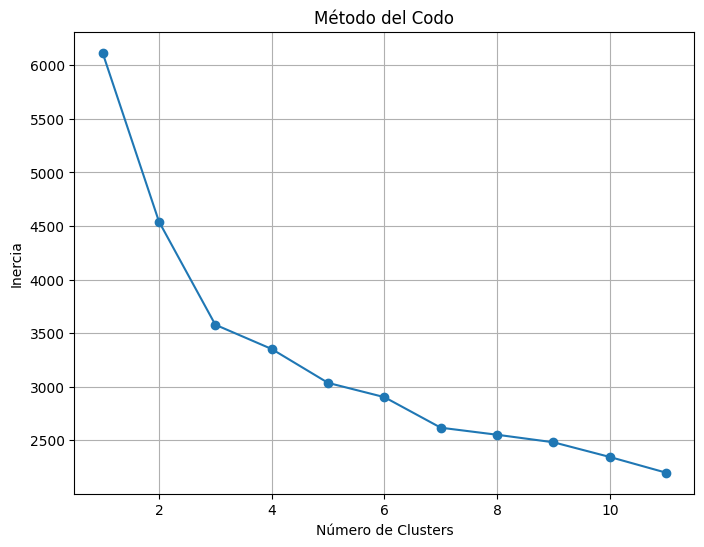

In [1038]:
kmeans(X, columnas=X.columns, max_clusters=11)

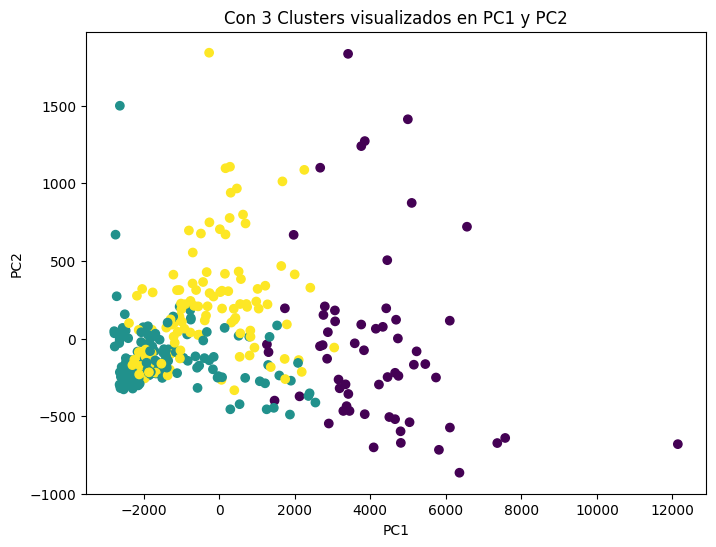

In [1039]:
clusters(df, clusters=3, comp_x='PC1', comp_y='PC2')

Con la gráfica de los componentes principales 1 y 2, podemos observar cómo se distribuyen los datos en este nuevo espacio reducido. Al aplicar K-Means, es evidente que es posible formar clusters bien definidos, ya que se distingue claramente la separación entre los datos de cada grupo. Esta representación de los tres clusters muestra que las dos primeras componentes principales son muy efectivas para resumir la estructura del conjunto de datos, permitiendo una clara diferenciación entre los grupos.



### Modelo con XGBoost

##### Con todas las variables

[0]	validation_0-rmse:398.02685	validation_1-rmse:438.74052
[100]	validation_0-rmse:222.38136	validation_1-rmse:333.59316
[200]	validation_0-rmse:153.52414	validation_1-rmse:321.80101
[230]	validation_0-rmse:142.25755	validation_1-rmse:322.13767
R2: 0.46576068383876756


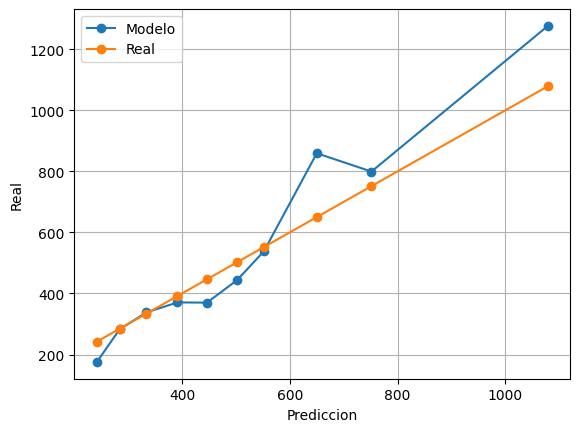

In [1042]:
model = XGBRegressor(
    n_estimators=10000, 
    max_depth=5,
    learning_rate=0.01,
    reg_lambda=0.1,
    subsample=0.5,
    colsample_bytree=0.8,
    early_stopping_rounds=40,
    tree_method='hist')
                    
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=100)

xgboost = model.predict(X_test)

print('R2:', r2_score(y_true=y_test, y_pred=xgboost))
calibracion(xgboost, y_test, bins=10)

##### Con los primeros 3 componentes

[0]	validation_0-rmse:398.15049	validation_1-rmse:438.92468
[100]	validation_0-rmse:253.96141	validation_1-rmse:369.48236
[200]	validation_0-rmse:186.97784	validation_1-rmse:351.73116
[236]	validation_0-rmse:172.14873	validation_1-rmse:353.48378
R2: 0.35723206444119426


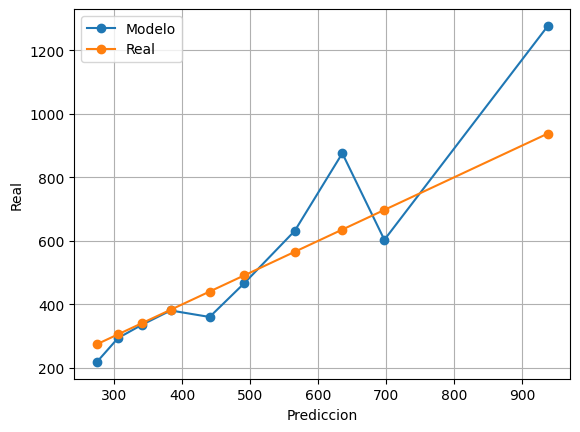

In [1048]:
x_tres_comp_train = x_comp_train[['PC1', 'PC2', 'PC3']]
x_tres_comp_test = x_comp_test[['PC1', 'PC2', 'PC3']]

model_tres_x_comp = XGBRegressor(
    n_estimators=10000, 
    max_depth=5,
    learning_rate=0.01,
    reg_lambda=0.1,
    subsample=0.5,
    colsample_bytree=0.8,
    early_stopping_rounds=40,
    tree_method='hist')
                    
model_tres_x_comp.fit(
    x_tres_comp_train, y_train,
    eval_set=[(x_tres_comp_train, y_train), (x_tres_comp_test, y_test)],
    verbose=100)

x_comp_3 = model_tres_x_comp.predict(x_tres_comp_test)
print('R2:', r2_score(y_true=y_test, y_pred=x_comp_3))
calibracion(x_comp_3, y_test, bins=10)

##### Con todos los componentes

[0]	validation_0-rmse:398.60600	validation_1-rmse:438.57258
[100]	validation_0-rmse:235.39055	validation_1-rmse:360.16051
[200]	validation_0-rmse:165.07607	validation_1-rmse:351.82746
[222]	validation_0-rmse:155.21916	validation_1-rmse:352.71484
R2: 0.36439992932135323


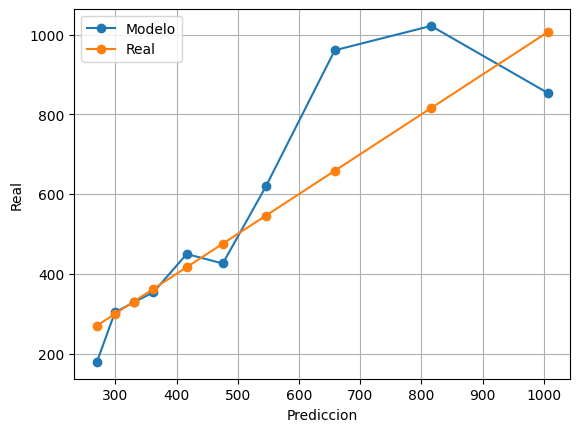

In [ ]:
model_x_comp = XGBRegressor(
    n_estimators=10000, 
    max_depth=5,
    learning_rate=0.01,
    reg_lambda=0.1,
    subsample=0.5,
    colsample_bytree=0.8,
    early_stopping_rounds=40,
    tree_method='hist')

model_x_comp.fit(
    x_comp_train, y_train,
    eval_set=[(x_comp_train, y_train), (x_comp_test, y_test)],
    verbose=100)

x_comp = model_x_comp.predict(x_comp_test)
print('R2:', r2_score(y_true=y_test, y_pred=x_comp))
calibracion(x_comp, y_test, bins=10)

### Conclusión 

Con solo las dos primeras componentes principales, se logra ver muy bien cómo están distribuidos los datos y cómo se pueden formar grupos (clusters) con K-Means. Estas dos componentes explican el 70% de toda la información del conjunto de datos, lo cual es bastante bueno considerando que originalmente tenía 19 variables. Gracias a esto, podemos trabajar con menos datos sin perder mucha información, y aun así entender bien cómo se comportan los grupos. No es necesario agregar más componentes, porque con estas dos ya se ve clara la separación entre los clusters.
Se obtuvo un mejor $R^2$ con todas las variables, los resultados de los componentes no fue tan malo , pero no podemos decir que fueron resultados excelentes. 